### OVERVIEW
**THIS PROJECT COVERS AN ANALYSIS OF FILM RATINGS OF A WEBSITE CALLED FANDANGO , ITS A WEBSITE FOR BOOKING MOVIE TICKETS AND WE R INTERESTED IN KNOWING WHETHER THE WEBSITE IS FRAUDULENT OR NOT DUE TO CONFILCIT OF INTEREST BETWEEN GIVING A FAIR RATING FOR A MOVIE AND SELLING THE MOST AMOUNT OF TICKETS.**

### The Data
Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

This project was completed as part of the Python for Machine Learning & Data Science Masterclass by Jose Portilla.

**importing the useful libraries in question**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### importing fandango data from the csv file and exploring its contents

In [3]:
fd=pd.read_csv('fandango_scrape.csv') #fd is  fandango data 


In [4]:
fd.head(5) # "FIlM" is teh film name , "STARS" is teh score shown on FANDANGO website ,"RATING" is the actual movie score from teh votes,"VOTES" well... its just the votes xD

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fd.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**exploring the relation between the popularity of a movie and its given rating**

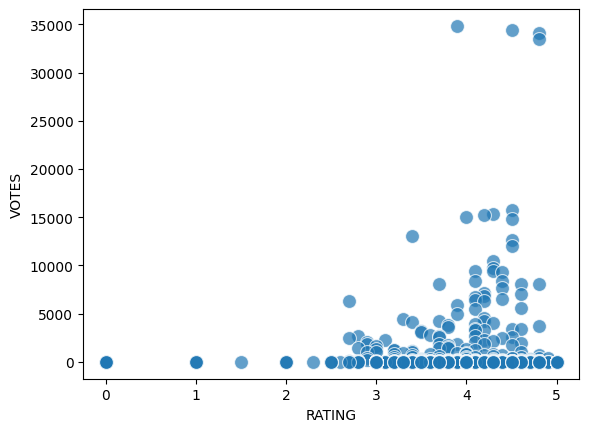

In [7]:
sns.scatterplot(data=fd,x='RATING',y='VOTES',s=100,alpha=0.7);

**the correlation between the fandango data columns**

In [8]:
fd.drop('FILM',axis=1).corr() 

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**stripping the year out of the 'FILM' column**

In [9]:
def year(x):
    return x[-5:-1]
fd['YEAR']=fd['FILM'].apply(year)


**lets find out number of moveis per given year**

In [10]:
fd['YEAR'].value_counts() 

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

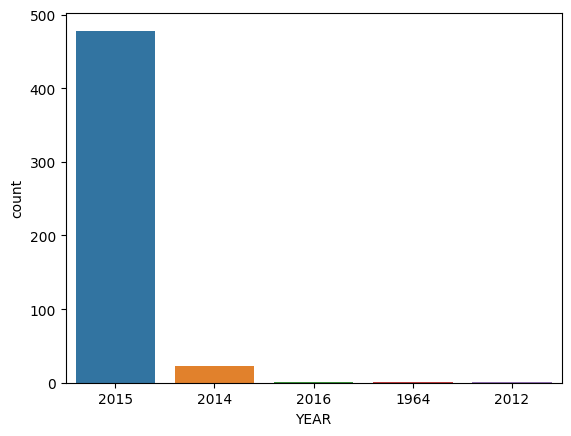

In [11]:
sns.countplot(data=fd,x='YEAR',hue='YEAR')

**top 10 movies by votes**


In [12]:
fd.sort_values('VOTES',ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**finding out how many moveis have 0 votes**

In [13]:
len(fd[fd['VOTES']==0])

69

**dataframe of non-zero votes films (actual relevant data to work with because we cant draw conclusions from films with zero votes)**

In [14]:
fd_non_zero=fd[fd['VOTES']!=0]
fd_non_zero

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**comparison between the distributions of the website shown rating "STARS" and the actual viewers votes "RATING"**

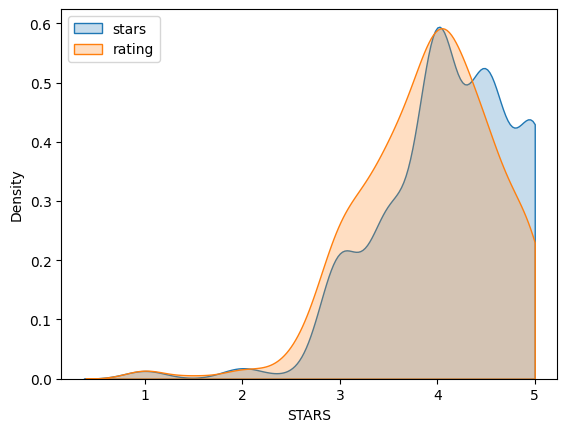

In [15]:
sns.kdeplot(data=fd_non_zero,x='STARS',clip=[0,5],fill=True,label='stars')
sns.kdeplot(data=fd_non_zero,x='RATING',clip=[0,5],fill=True,label='rating') # the plots are clipped becuase of how the kde gets estimated 
#it can generate values slightly higher than 5 and lower than 0 which is of course not true in our case
plt.legend(loc=0)

**the diffrence between the shown stars and the actual viewers ratings, rounded and visualized**

In [16]:
fd_non_zero['DIFFERENCE']=round(((fd_non_zero['STARS']-fd_non_zero['RATING'])),1)
fd_non_zero

C:\Users\pc\AppData\Local\Temp\ipykernel_15492\1640804717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd_non_zero['DIFFERENCE']=round(((fd_non_zero['STARS']-fd_non_zero['RATING'])),1)


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [17]:
fd_non_zero['DIFFERENCE'].value_counts()

DIFFERENCE
0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: count, dtype: int64

<Axes: xlabel='DIFFERENCE', ylabel='count'>

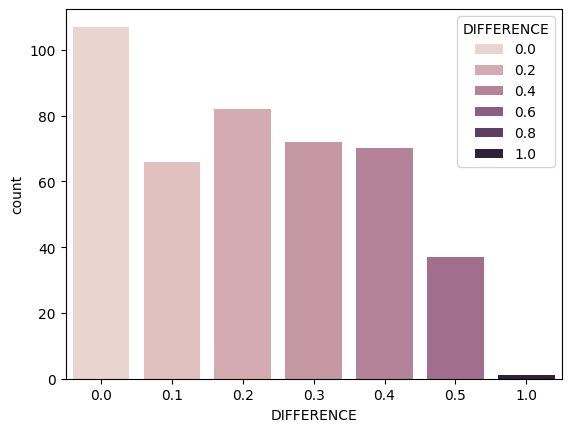

In [18]:
sns.countplot(data=fd_non_zero,x='DIFFERENCE',hue='DIFFERENCE')

In [19]:
fd_non_zero[fd_non_zero['DIFFERENCE']==1] # this movei has a whole start difference which is pretty huge and alarming

,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### this section explores the data from other sites

**importing the data and getting familiar with its content**

In [20]:
ad=pd.read_csv('all_sites_scores.csv') # ad is all sites data

In [ ]:
ad.head() # as we can see some websites have critics scores and user scores 
#some have the scores on a scale from 0 to 100 while others from 0 to 10 so we will need to normalize these scores later to be on the same scale

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [23]:
ad.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### exploring rotten tomatoes scores

**relation betwenn critics scores "RottenTomatoes" and user scores "RottenTomatoes_User"**

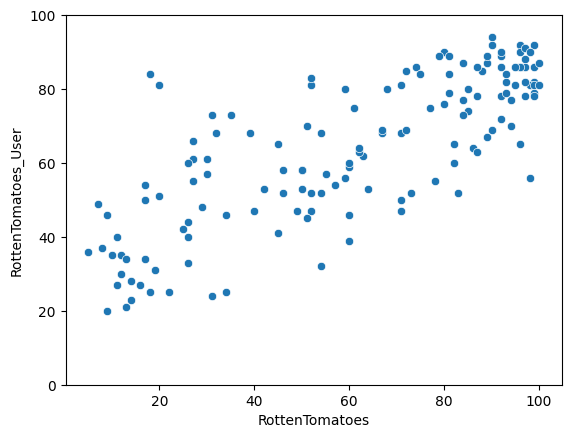

In [24]:
sns.scatterplot(data=ad,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100);


**lets quantify and visualize the absolute and signed difference betwenn the critics and users opinions and find the mean of that**

In [25]:
ad['DIFFERENCE']=ad['RottenTomatoes']-ad['RottenTomatoes_User']
ad['abs_DIFFERENCE']=abs(ad['RottenTomatoes']-ad['RottenTomatoes_User'])
ad['abs_DIFFERENCE'].mean()

np.float64(15.095890410958905)

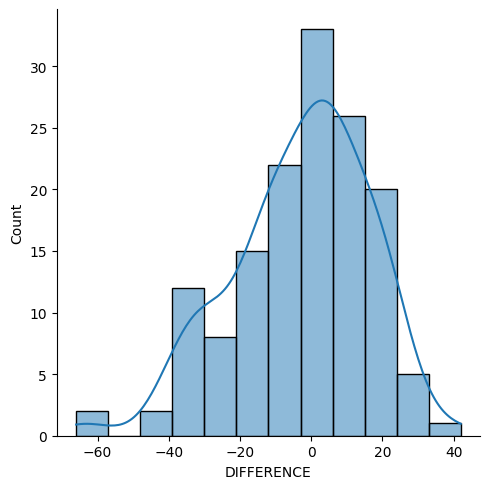

In [26]:
sns.displot(data=ad,x='DIFFERENCE',kde=True) 
# neagtive vaalues means the user scores are higher than the critics scores and positive scores means that the critics are higher
# we can see that there is couple films that the users liked way better than teh critics did and vice versa

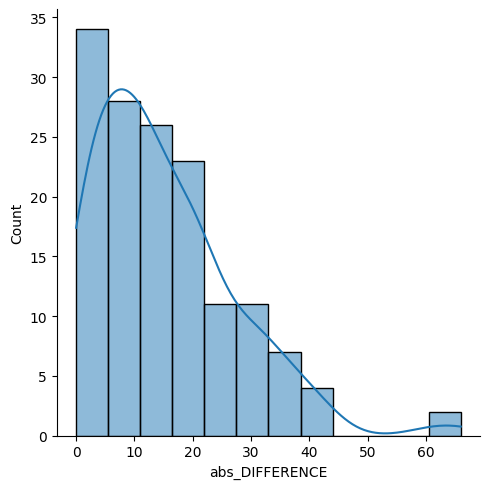

In [27]:
sns.displot(data=ad,x='abs_DIFFERENCE',kde=True)

**now lets find the films that the users liked more than the critics**

In [28]:
ad.nsmallest(5,'DIFFERENCE')[['FILM','DIFFERENCE']]

,FILM,DIFFERENCE
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**the films the critics liked more than teh users**

In [29]:
ad.nlargest(5,'DIFFERENCE')[['FILM','DIFFERENCE']]

,FILM,DIFFERENCE
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### METACRITIC AND IMDB DATA EXPLORATION

**similar to RT it got critics scores of scale 0-100 "Metacritic" and users scores of scale 0-10 "Metacritic_user" so lets comapre between them with a scatter plot**

(0.0, 100.0)

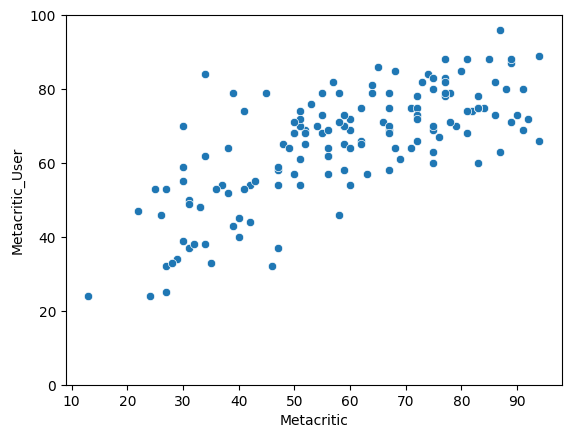

In [ ]:
sns.scatterplot(data=ad,x='Metacritic',y=ad['Metacritic_User']*10) # (*10) just for visulization convenience 
plt.ylim(0,100)

**METACRITIC ADN IMDB both have vote counts for the movies so lets see the relation between them**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

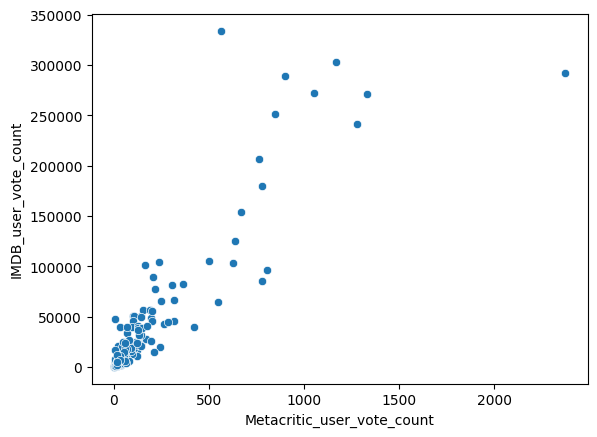

In [31]:
sns.scatterplot(data=ad,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**lets find the film with highest vote count on IMDB and on Metacritic**

In [32]:
ad.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFFERENCE,abs_DIFFERENCE
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


In [33]:
ad.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFFERENCE,abs_DIFFERENCE
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


### NOW LETS COMPARE FANDANGO VS ALL SITES

**to be able to compare both data sets we have to make sure that we are working with films that are present in both sets so we do inner merge to get the data set we gonna use in teh comparison**

In [34]:
df=pd.merge(fd,ad,how='inner',on='FILM')


In [35]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFFERENCE,abs_DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


**so.. we need to normalize all scores to be on a scale of 0 to 5**

In [ ]:
df[['RottenTomatoes','RottenTomatoes_User','Metacritic']]=df[['RottenTomatoes','RottenTomatoes_User','Metacritic']]/20 # for scores on the scale of 0-100


In [ ]:
df[['Metacritic_User','IMDB']]=df[['Metacritic_User','IMDB']]/2 # for scores on tehs cale of 0 to 10

In [38]:
n_scores=df.drop(['DIFFERENCE','abs_DIFFERENCE'],axis=1)

In [39]:
n_scores=n_scores.drop(['VOTES','YEAR','IMDB_user_vote_count','Metacritic_user_vote_count'],axis=1)

In [40]:
n_scores.describe().loc['max'] # we can see that all scores are normalized to 0-5 

STARS                  5.0
RATING                 4.8
RottenTomatoes         5.0
RottenTomatoes_User    4.7
Metacritic             4.7
Metacritic_User        4.8
IMDB                   4.3
Name: max, dtype: float64

In [41]:
n_scores

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.35,3.15,3.40,3.20,3.35
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.75,4.05,4.35,3.15,3.50
142,The Wrecking Crew (2015),4.5,4.2,4.65,4.20,3.35,3.50,3.90
143,Tangerine (2015),4.0,3.9,4.75,4.30,4.30,3.65,3.70


**NOW LETS SEE IF FANDANGO GOT CONFLICT OF INTERESTS**

<Axes: ylabel='Density'>

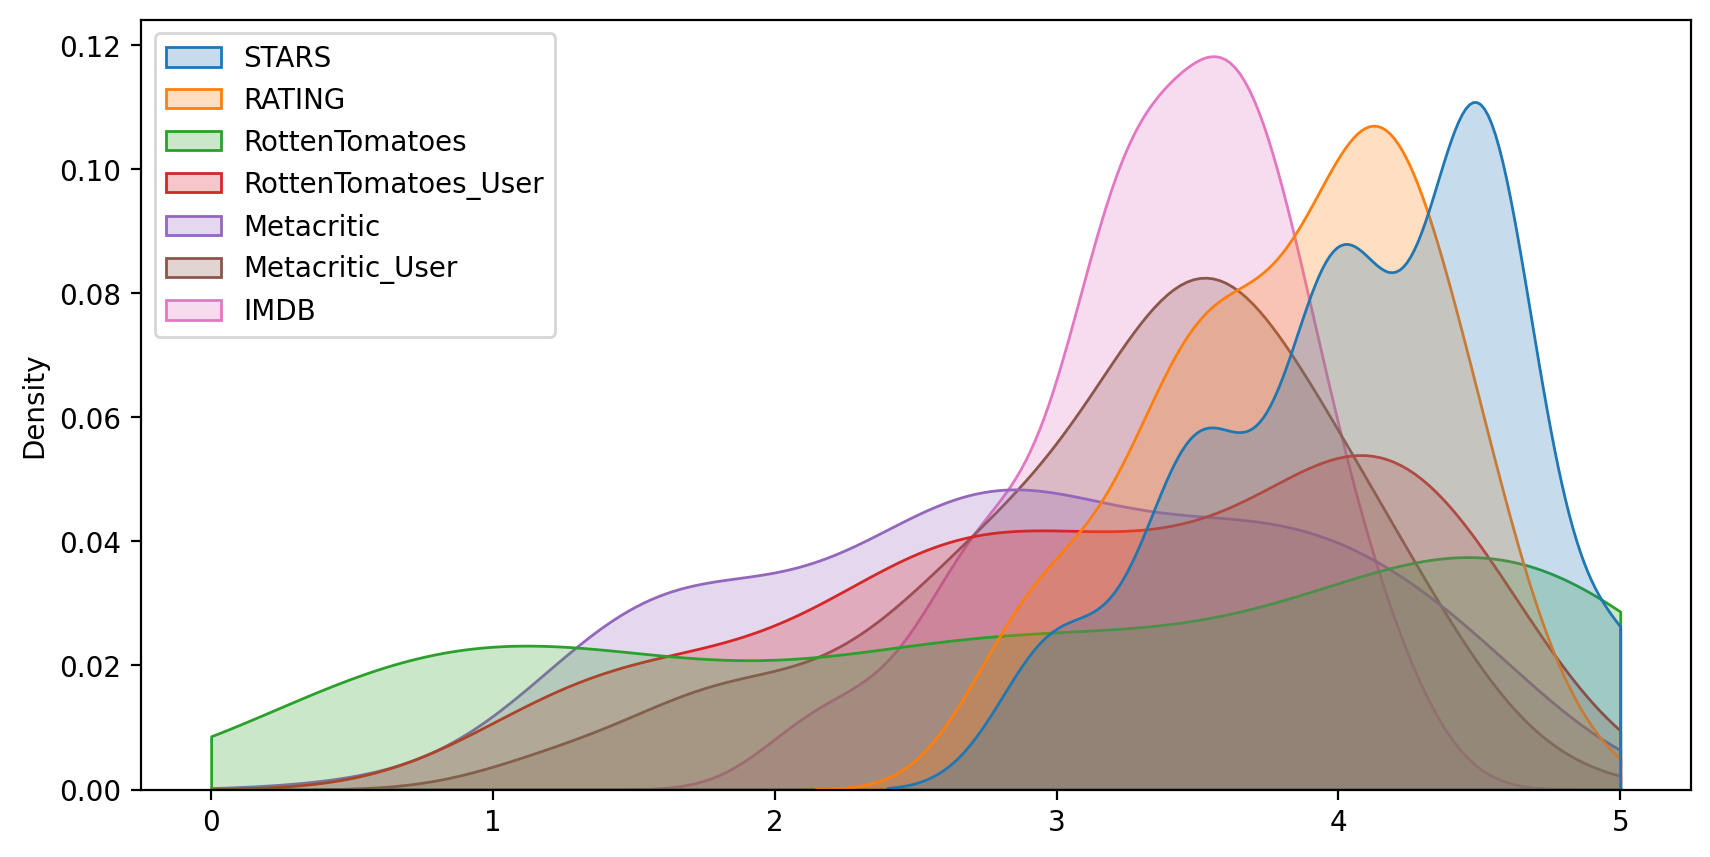

In [ ]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=n_scores,fill=True,clip=[0,5]) 


**its clear that fandango got uneaven distripution that tends to give higher scores for movies and rarely give bad scores for films compared to RottenTomatoes critics which have the most uniform distriptuion**

(0.0, 1.0)

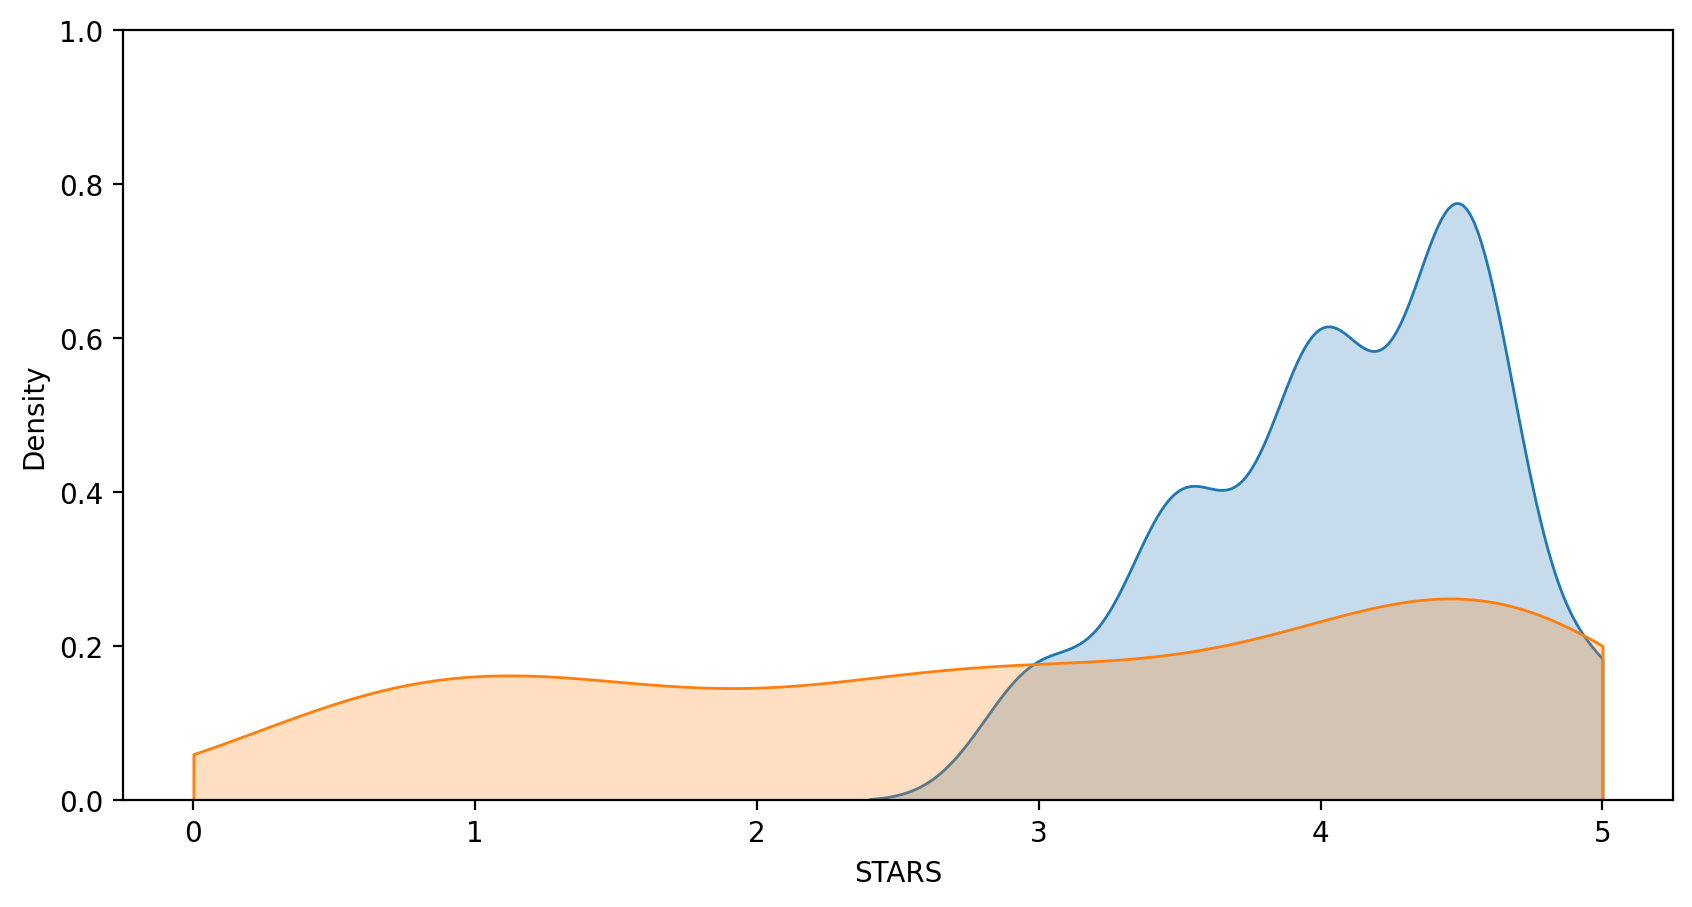

In [43]:
plt.figure(figsize=(10,5),dpi=200)
sns.kdeplot(data=n_scores,x='STARS',fill=True,clip=[0,5])
sns.kdeplot(data=n_scores,x='RottenTomatoes',fill=True,clip=[0,5])
plt.ylim(0,1)

<Axes: ylabel='Count'>

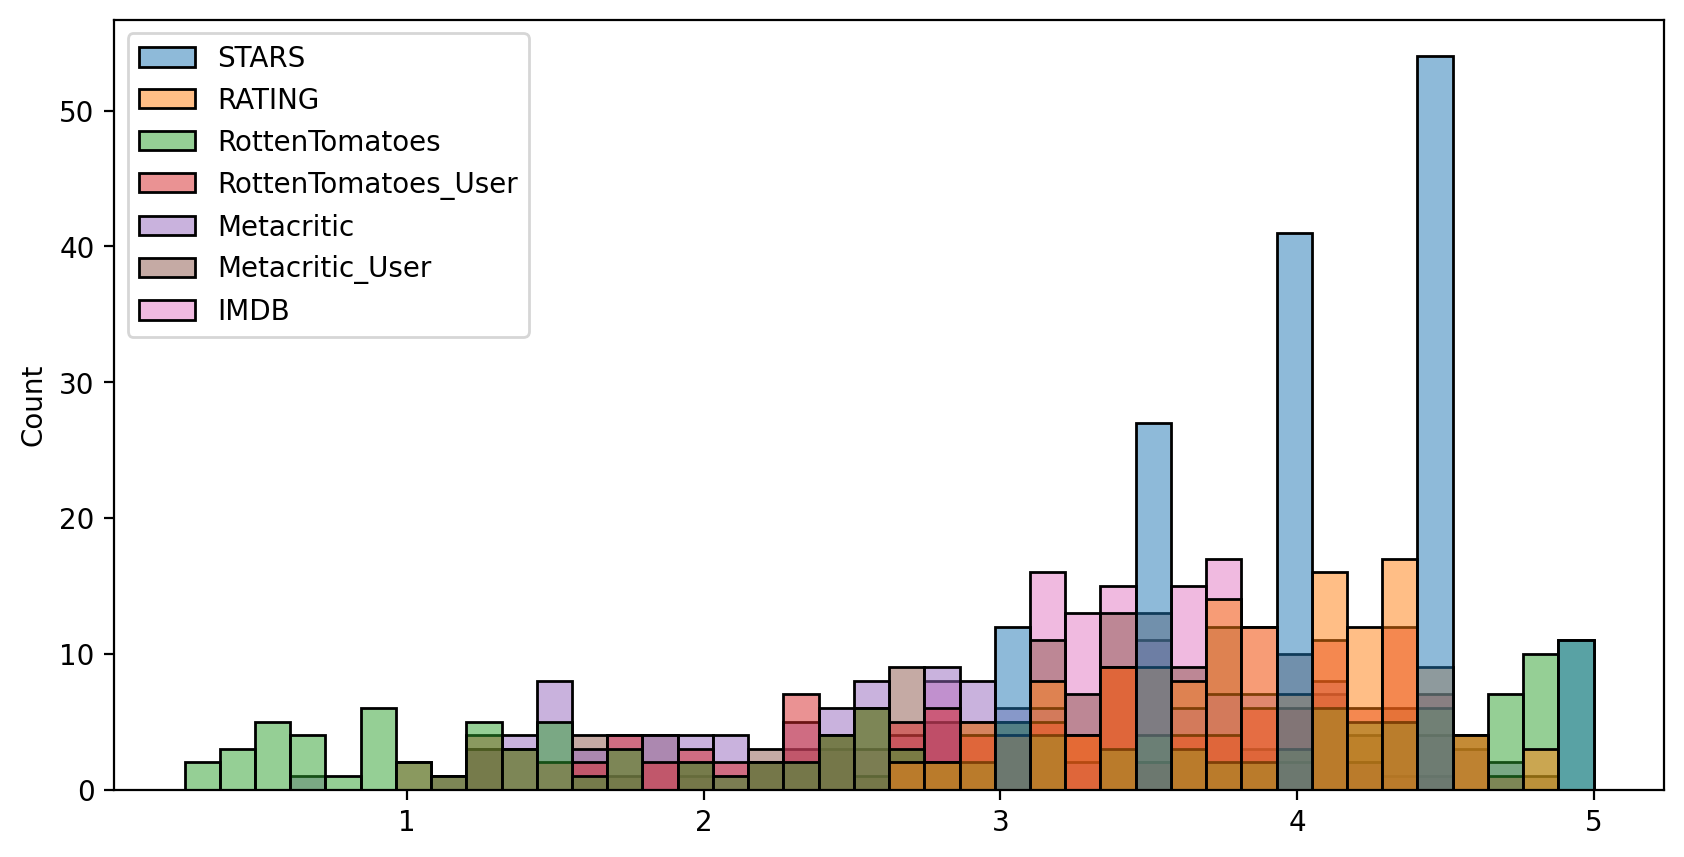

In [44]:
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=n_scores,bins=40)

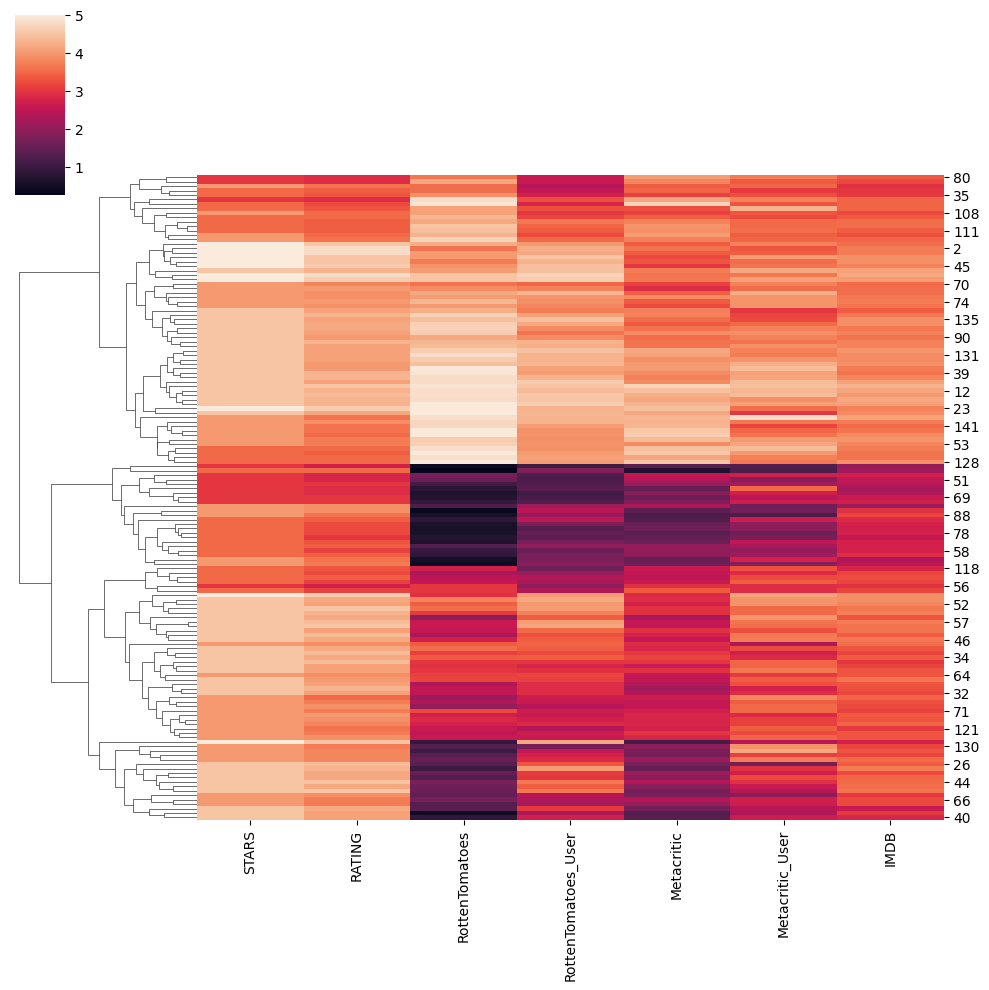

In [51]:

sns.clustermap(data=n_scores.drop('FILM',axis=1),col_cluster=False)

**from this clsutermap we can see that FANDANGO is the softest in its scores and rarely gives harsh reviews**

**since RottenTomamtoes critics have the most unifrom distripution we will consider them as the reference**

In [46]:
lowest_movies=n_scores.nsmallest(10,'RottenTomatoes')

<Axes: ylabel='Density'>

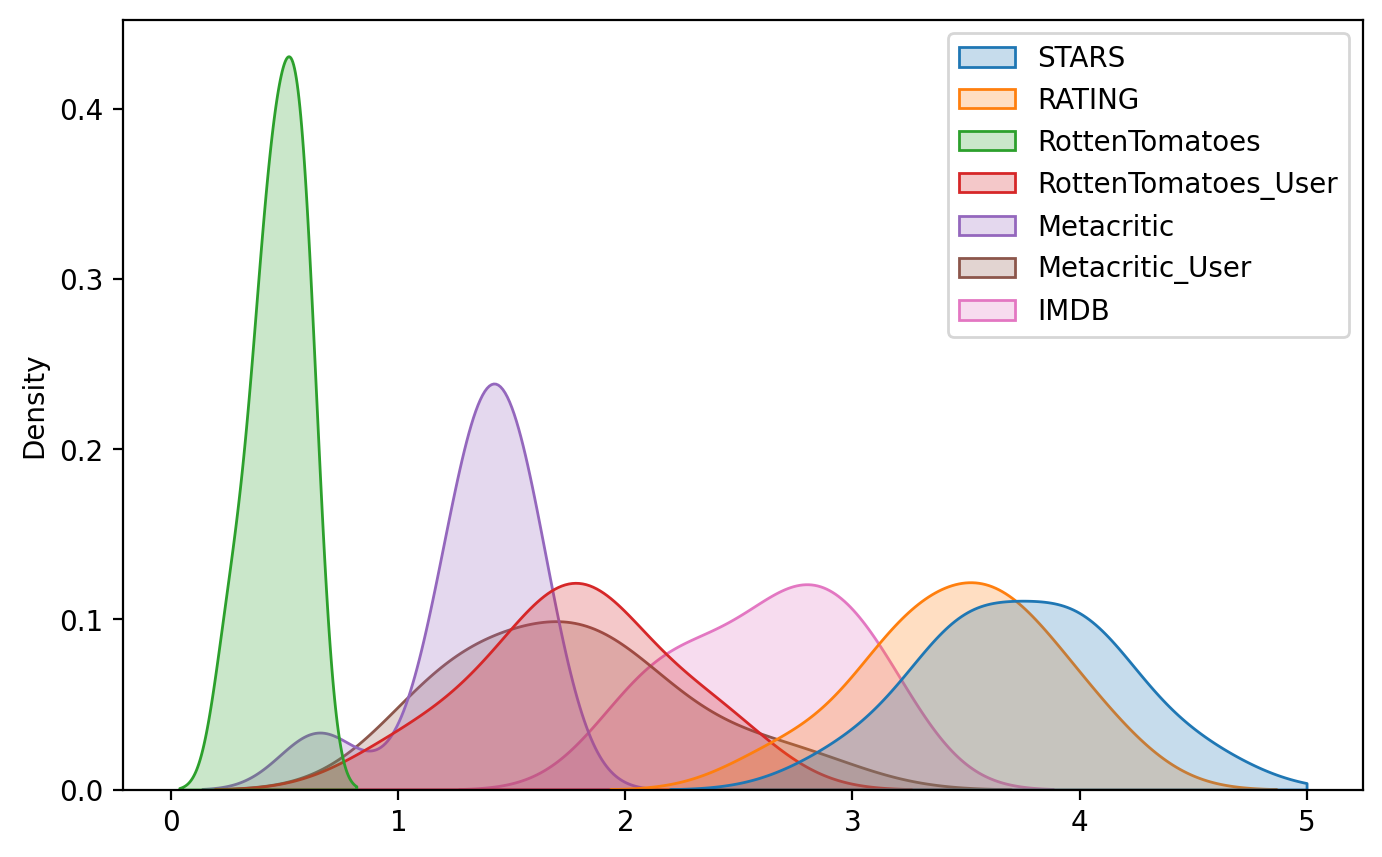

In [ ]:
plt.figure(figsize=(8,5),dpi=200)
sns.kdeplot(data=lowest_movies,fill=True,clip=[0,5]) 

**here its showing that FANDANGO is giving at least 3 stars for films that are clearly bad which indicates that there is a conflict of interest in fandango website between giving credible ratings and faking out customers to buy more movie tickets from thier website**

In [52]:
non_fandango=lowest_movies.drop(['STARS','RATING'],axis=1)

**lets find the average scores across all other sites for the 10 lowest scores movies according to RottenTomatoes**

In [ ]:
non_fandango.drop('FILM',axis=1).mean(axis=1)

49    1.21
84    1.76
54    1.62
25    1.88
28    1.21
50    1.76
87    1.62
88    1.62
77    1.71
78    1.56
dtype: float64

**now lets see the scores that FANDANGO gave for the same movies**

In [ ]:
lowest_movies['STARS']

49    3.5
84    4.0
54    4.0
25    4.5
28    3.0
50    4.0
87    3.5
88    4.0
77    3.5
78    3.5
Name: STARS, dtype: float64

**IT IS SHOWING THAT FANDANGO IS GIVING AT LEAST 3 STARS FOR FILMS THAT HAVE SCORES BETWEEN 1.2-1.9 ON AVERAGE ON ALL OTHER SITES**

**FINAL CONCLUSION: yes there is a fraudulent behavior in FANDANGO scores due to confilict of interest between giving the movies an actual review and the desire to sell more movie tickets**